<a href="https://colab.research.google.com/github/suryadeepti/Tensorflow_beginner/blob/main/Tensorflow_basic_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch:   200 	 Cost:   0.08025 	 W:0.2843 	 b:0.5671
Epoch:   400 	 Cost:   0.07897 	 W:0.2773 	 b:0.6171
Epoch:   600 	 Cost:   0.07819 	 W:0.2717 	 b:0.6563
Epoch:   800 	 Cost:    0.0777 	 W:0.2674 	 b: 0.687
Epoch:  1000 	 Cost:    0.0774 	 W: 0.264 	 b:0.7111
Epoch:  1200 	 Cost:   0.07722 	 W:0.2613 	 b:  0.73
Epoch:  1400 	 Cost:   0.07711 	 W:0.2592 	 b:0.7449
Epoch:  1600 	 Cost:   0.07704 	 W:0.2576 	 b:0.7565
Epoch:  1800 	 Cost:     0.077 	 W:0.2563 	 b:0.7656
Epoch:  2000 	 Cost:   0.07697 	 W:0.2553 	 b:0.7728
Optimization Finished!
Final training cost: 0.07697076 W: 0.25530595 b: 0.7727754 



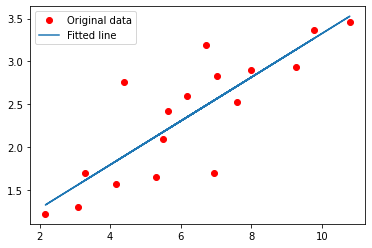

Final testing cost: 0.07758856
Absolute mean square loss difference: 0.0006177947


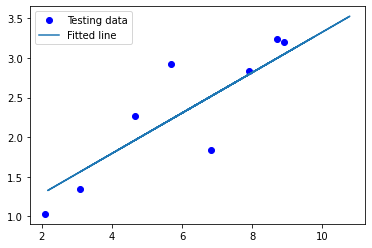

Epoch:   200 	 Cost:     0.303 	 W:0.5212 	 b:-1.112
Epoch:   400 	 Cost:     0.216 	 W:0.4631 	 b:-0.7001
Epoch:   600 	 Cost:    0.1625 	 W:0.4175 	 b:-0.3769
Epoch:   800 	 Cost:    0.1296 	 W:0.3817 	 b:-0.1233
Epoch:  1000 	 Cost:    0.1093 	 W:0.3537 	 b:0.07554
Epoch:  1200 	 Cost:   0.09685 	 W:0.3317 	 b:0.2315
Epoch:  1400 	 Cost:   0.08918 	 W:0.3144 	 b:0.3539
Epoch:  1600 	 Cost:   0.08447 	 W:0.3009 	 b:0.4498
Epoch:  1800 	 Cost:   0.08157 	 W:0.2902 	 b:0.5251
Epoch:  2000 	 Cost:   0.07978 	 W:0.2819 	 b:0.5841
Optimization Finished!
Final training cost: 0.07978191 W: 0.2819177 b: 0.58411 



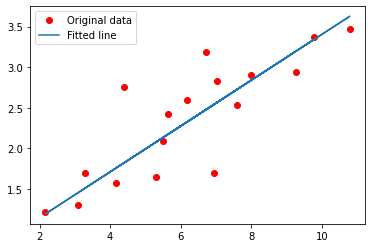

Final testing cost: 0.07530195
Absolute mean square loss difference: 0.0044799596


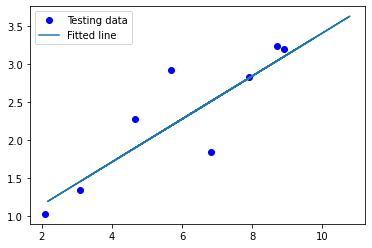

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
  
# Model Parameters 
learning_rate = 0.01
training_epochs = 2000
display_step = 200
  
# Training Data 
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167, 
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1]) 
train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221, 
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 
n_samples = train_X.shape[0] 
  
# Test Data 
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1]) 
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03]) 
  
# Set placeholders for feature and target vectors 
#X = tf.placeholder(tf.float32) 
X=tf.keras.Input(shape=(), dtype=tf.dtypes.float32)
y = tf.keras.Input(shape=(), dtype=tf.dtypes.float32)
  
# Set model weights and bias 
W = tf.Variable(np.random.randn(), name="weight") 
b = tf.Variable(np.random.randn(), name="bias") 
  
# Construct a linear model 
linear_model = W*X + b 
  
# Mean squared error 
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2*n_samples) 
  
# Gradient descent 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Initializing the variables 
init = tf.global_variables_initializer() 
  
# Launch the graph 
with tf.Session() as sess: 
    # Load initialized variables in current session 
    sess.run(init) 
  
    # Fit all training data 
    for epoch in range(training_epochs): 
  
        # perform gradient descent step 
        sess.run(optimizer, feed_dict={X: train_X, y: train_y}) 
          
        # Display logs per epoch step 
        if (epoch+1) % display_step == 0: 
            c = sess.run(cost, feed_dict={X: train_X, y: train_y}) 
            print("Epoch:{0:6} \t Cost:{1:10.4} \t W:{2:6.4} \t b:{3:6.4}". 
                  format(epoch+1, c, sess.run(W), sess.run(b))) 
              
    # Print final parameter values 
    print("Optimization Finished!") 
    training_cost = sess.run(cost, feed_dict={X: train_X, y: train_y}) 
    print("Final training cost:", training_cost, "W:", sess.run(W), "b:",  
          sess.run(b), '\n') 
      
    # Graphic display 
    plt.plot(train_X, train_y, 'ro', label='Original data') 
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line') 
    plt.legend() 
    plt.show() 
  
    # Testing the model 
    testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_X.shape[0]), 
                            feed_dict={X: test_X, y: test_y}) 
      
    print("Final testing cost:", testing_cost) 
    print("Absolute mean square loss difference:", abs(training_cost - testing_cost)) 
  
    # Display fitted line on test data 
    plt.plot(test_X, test_y, 'bo', label='Testing data') 
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line') 
    plt.legend() 
    plt.show() 
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
  
# Model Parameters 
learning_rate = 0.01
training_epochs = 2000
display_step = 200
  
# Training Data 
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167, 
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1]) 
train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221, 
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 
n_samples = train_X.shape[0] 
  
# Test Data 
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1]) 
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03]) 
  
# Set placeholders for feature and target vectors 
#X = tf.placeholder(tf.float32) 
X=tf.keras.Input(shape=(), dtype=tf.dtypes.float32)
  
# Set model weights and bias 
W = tf.Variable(np.random.randn(), name="weight") 
b = tf.Variable(np.random.randn(), name="bias") 
  
# Construct a linear model 
linear_model = W*X + b 
  
# Mean squared error 
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2*n_samples) 

# Gradient descent 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Initializing the variables 
init = tf.global_variables_initializer() 
  
# Launch the graph 
with tf.Session() as sess: 
    # Load initialized variables in current session 
    sess.run(init) 
  
    # Fit all training data 
    for epoch in range(training_epochs): 
  
        # perform gradient descent step 
        sess.run(optimizer, feed_dict={X: train_X, y: train_y}) 
          
        # Display logs per epoch step 
        if (epoch+1) % display_step == 0: 
            c = sess.run(cost, feed_dict={X: train_X, y: train_y}) 
            print("Epoch:{0:6} \t Cost:{1:10.4} \t W:{2:6.4} \t b:{3:6.4}". 
                  format(epoch+1, c, sess.run(W), sess.run(b))) 
              
    # Print final parameter values 
    print("Optimization Finished!") 
    training_cost = sess.run(cost, feed_dict={X: train_X, y: train_y}) 
    print("Final training cost:", training_cost, "W:", sess.run(W), "b:",  
          sess.run(b), '\n') 
      
    # Graphic display 
    plt.plot(train_X, train_y, 'ro', label='Original data') 
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line') 
    plt.legend() 
    plt.show() 
  
    # Testing the model 
    testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_X.shape[0]), 
                            feed_dict={X: test_X, y: test_y}) 
      
    print("Final testing cost:", testing_cost) 
    print("Absolute mean square loss difference:", abs(training_cost - testing_cost)) 
  
    # Display fitted line on test data 
    plt.plot(test_X, test_y, 'bo', label='Testing data') 
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line') 
    plt.legend() 
    plt.show() 